# Amazon Alexa Reviews Analysis

**Objective:**

**Data Description:**
      
| Variables | Description | Type |
| :- | :-: | -: |
| Rating | It is the rating given by the customer. It ranges between 1-5. | Integer |
| Date | It is the date when the reveiw was posted. | String |
| Variation | Type of the product. | String |
| Verified Reviews | Description of the review. | String |
| Feedback | Feedback recieved or not. It ranges between 0 and 1. | Integer |

## Libraries

In [355]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


## Data Preprocessing

Importing the data.

In [356]:
df=pd.read_csv('amazon_alexa.tsv',sep='\t')
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


General information about the data.

In [357]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


There are no null values in the dataset.

### Feature: Rating

In [358]:
print("Types of unique values: ",df['rating'].unique())

Types of unique values:  [5 4 3 2 1]


<AxesSubplot:xlabel='rating', ylabel='Count'>

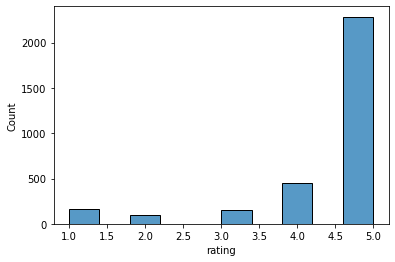

In [359]:
sns.histplot(data=df, x="rating", bins= 10)

### Feature: Feedback

In [360]:
print("Types of unique values: ",df['feedback'].unique())

Types of unique values:  [1 0]


<AxesSubplot:xlabel='feedback', ylabel='Count'>

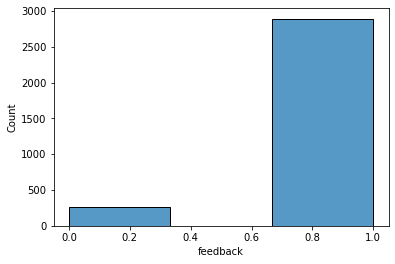

In [361]:
sns.histplot(data=df, x="feedback", bins= 3)

<AxesSubplot:xlabel='rating', ylabel='Count'>

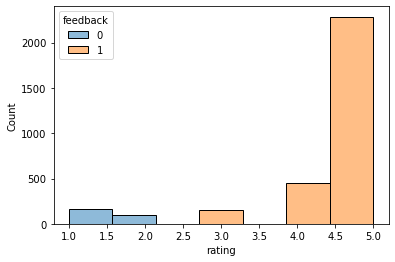

In [362]:
sns.histplot(data=df, x="rating", bins= 7, hue= "feedback")

### Feature: Variation

In [363]:
print("Types of unique values: ",df['variation'].unique())

Types of unique values:  ['Charcoal Fabric ' 'Walnut Finish ' 'Heather Gray Fabric '
 'Sandstone Fabric ' 'Oak Finish ' 'Black' 'White' 'Black  Spot'
 'White  Spot' 'Black  Show' 'White  Show' 'Black  Plus' 'White  Plus'
 'Configuration: Fire TV Stick' 'Black  Dot' 'White  Dot']


<AxesSubplot:xlabel='variation', ylabel='Count'>

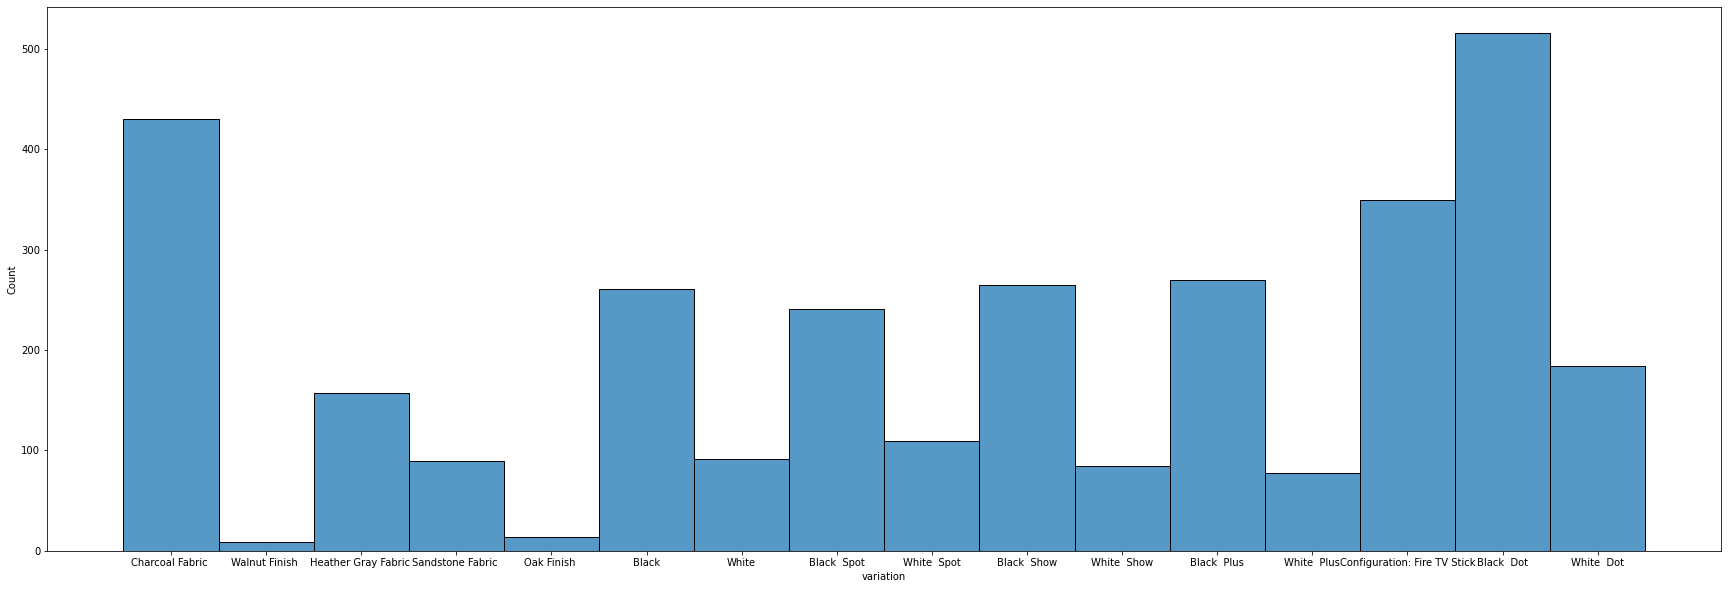

In [364]:
fig_dims = (30, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.histplot(data=df, x="variation", bins= 10, ax=ax)

<AxesSubplot:xlabel='variation', ylabel='Count'>

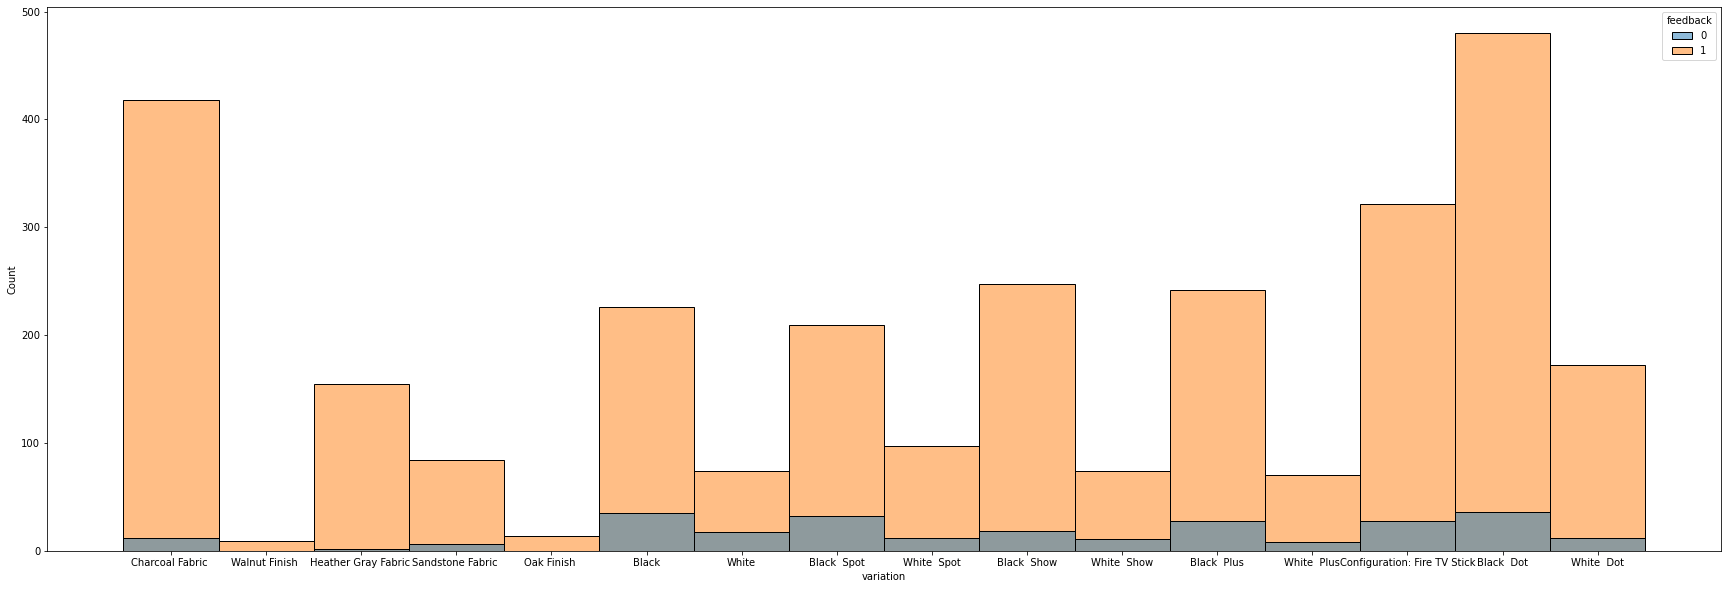

In [365]:
fig_dims = (30, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.histplot(data=df, x="variation", bins= 10, ax=ax, hue = 'feedback')

### Feature: Date

Transforming date column.

In [366]:
cal = pd.to_datetime(df['date'], format='%d-%b-%y')

In [367]:
df["Month"] = cal.dt.month
df["Year"] = cal.dt.year
df["Day"] = cal.dt.day

In [368]:
df.head()

,rating,date,variation,verified_reviews,feedback,Month,Year,Day
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,7,2018,31
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,7,2018,31
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,7,2018,31
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,7,2018,31
4,5,31-Jul-18,Charcoal Fabric,Music,1,7,2018,31


sns.histplot(data=df, x="Day", bins= 10)

<AxesSubplot:xlabel='Month', ylabel='Count'>

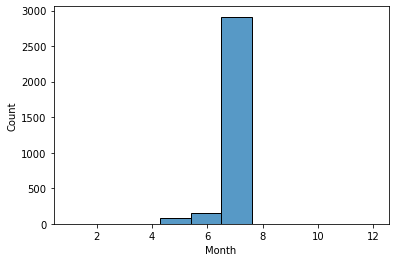

In [369]:
sns.histplot(data=df, x="Month", bins= 10, binrange=(1,12))

### Feature: Verified Reviews

Calculating length of verified reviews.

In [370]:
arr = []
for i in range(0,len(df['verified_reviews'])): 
    arr.append(len(df['verified_reviews'][i]))
df["Reviews Length"] = arr  

In [371]:
df.head()

,rating,date,variation,verified_reviews,feedback,Month,Year,Day,Reviews Length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,7,2018,31,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,7,2018,31,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,7,2018,31,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,7,2018,31,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,7,2018,31,5


<AxesSubplot:xlabel='Reviews Length', ylabel='Count'>

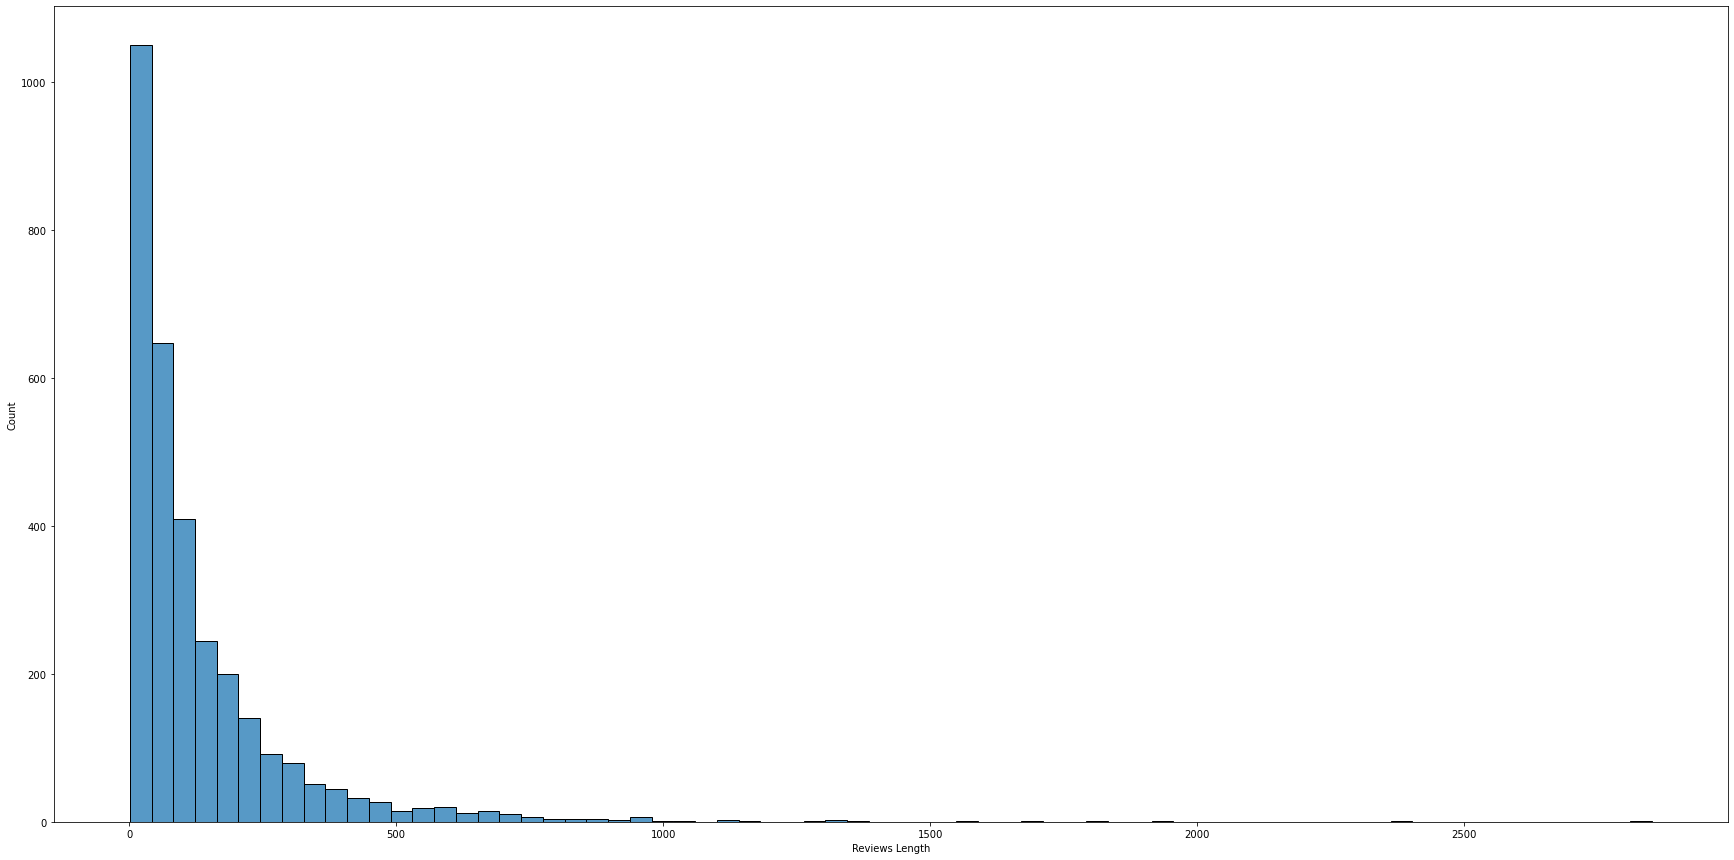

In [372]:
fig_dims = (30, 15)
fig, ax = plt.subplots(figsize=fig_dims)
sns.histplot(data=df, x="Reviews Length", bins= 70, ax = ax)

<AxesSubplot:xlabel='Reviews Length', ylabel='Count'>

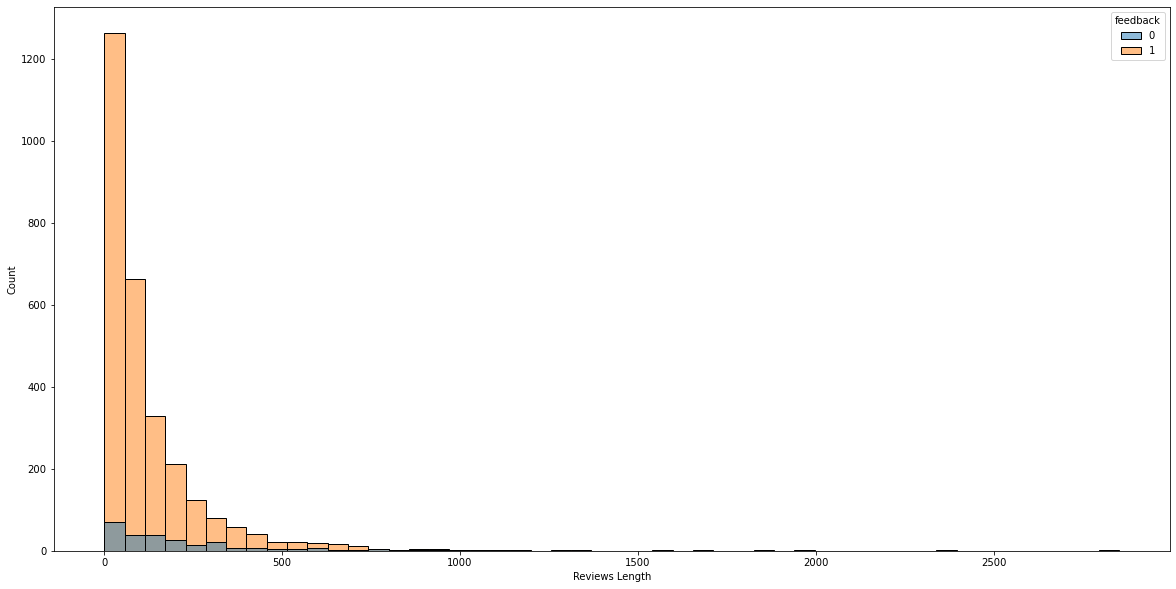

In [373]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.histplot(data=df, x="Reviews Length", bins= 50, ax = ax, hue = 'feedback')

### Feature: Verified Reviews

In [424]:
import spacy
nlp = spacy.load('en_core_web_sm')
rev = ' '.join(df['verified_reviews'].tolist())
doc = nlp(rev)

In [429]:
tokens = pd.DataFrame(columns=['Token','Lemma','Stopwards'])

tok = []
lem = []
stop = [] 
for t in doc:
    tok.append(str(t))
    lem.append(t.lemma_)
    stop.append(t.is_stop)


tokens["Token"] = tok
tokens['Lemma'] = lem
tokens['Stopwards'] = stop

tokens.head()

,Token,Lemma,Stopwards
0,Love,love,False
1,my,my,True
2,Echo,Echo,False
3,!,!,False
4,Loved,love,False


In [430]:
tokens.shape

(93002, 3)

In [427]:
print("Total number of non-important words: ",tokens['Stopwards'][tokens['Stopwards']==True].count())
print("Total number of important words: ",tokens['Stopwards'][tokens['Stopwards']==False].count())

Total number of non-important words:  46591
Total number of important words:  46411


Dropping non-important words.

In [432]:
tokens = tokens.loc[tokens["Stopwards"] != True]
tokens.head()

,Token,Lemma,Stopwards
0,Love,love,False
2,Echo,Echo,False
3,!,!,False
4,Loved,love,False
6,!,!,False


In [433]:
tokens.shape

(46411, 3)

In [452]:
import re
regex = re.compile('[@_!#$%^&*()"''"<>?/\|}{~:,.;-=+<>?~`]')
temp = tokens.loc[tokens['Token'].str.contains(regex, regex=True) == False]

In [453]:
temp.shape

(36220, 3)

<AxesSubplot:xlabel='count', ylabel='Token'>

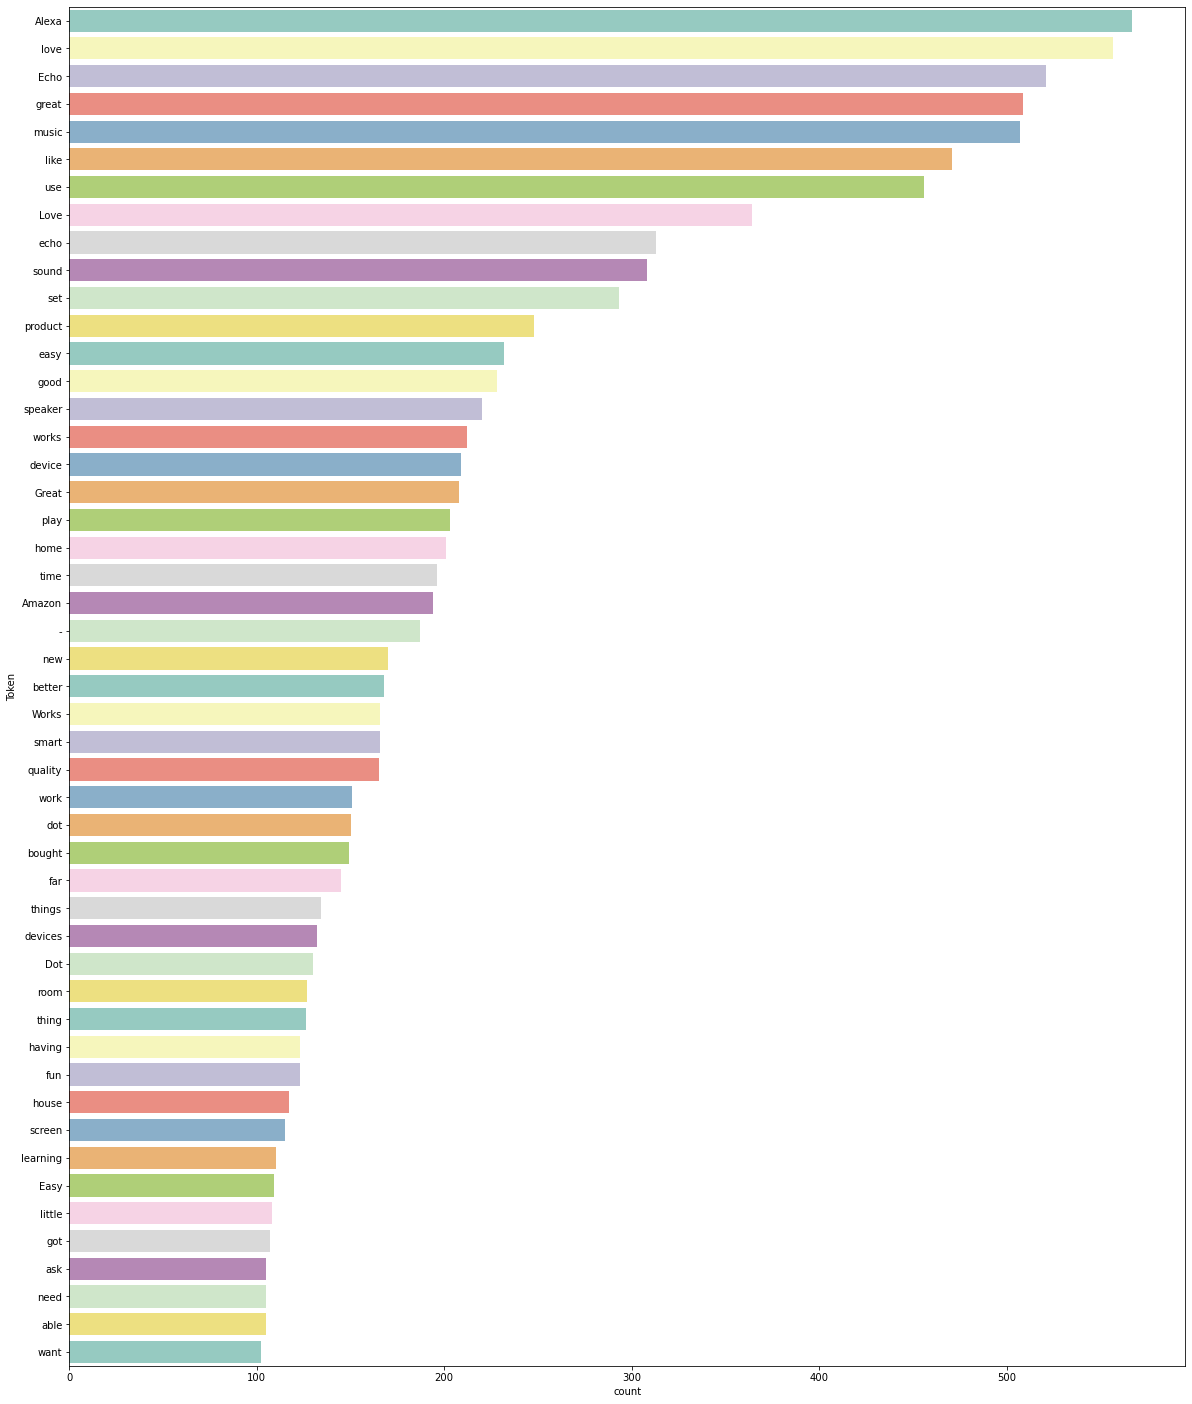

In [454]:
fig_dims = (20, 25)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(data=temp, y="Token", order = temp['Token'].value_counts().iloc[1:50].index, palette="Set3")

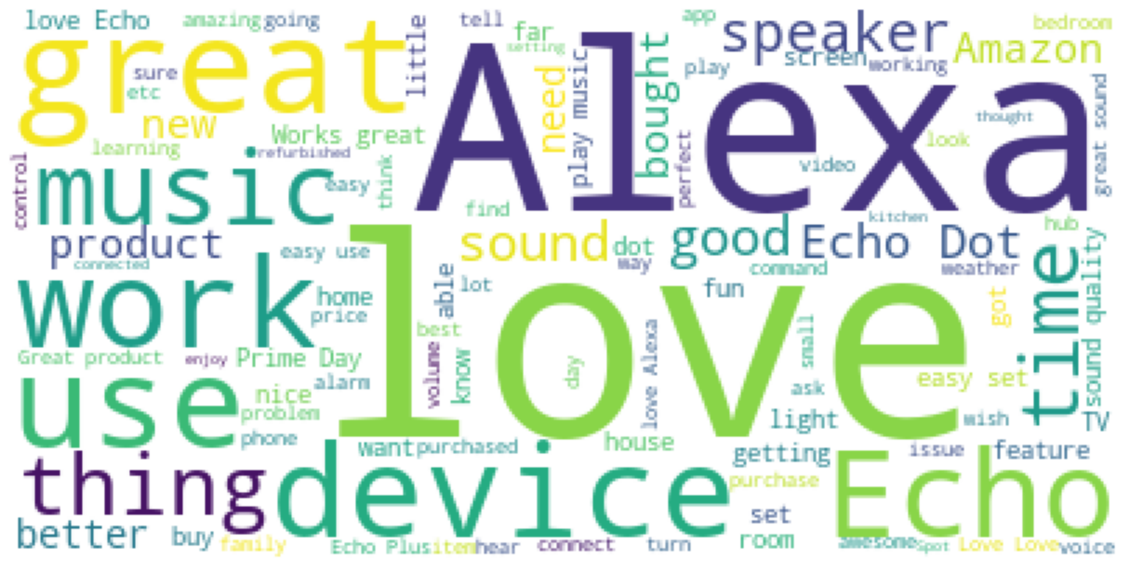

In [474]:
from wordcloud import WordCloud

# Read the whole text.
text = ' '.join(temp['Token'].tolist())

# Generate a word cloud image
wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt


# take relative word frequencies into account, lower max_font_size
wordcloud = WordCloud(background_color="white",max_words=100,max_font_size=100, relative_scaling=.5, min_word_length=2,).generate(text)
plt.figure(figsize=(20,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()